# <center>Learning how to play Space Invaders with RL.</center>

![space invaders poster image](https://cdn-images-1.medium.com/max/1200/1*Ya6drllhmC82yh0J-elrPA.jpeg)

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 825636470623805927
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3324575744
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14236126004072532655
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
import gym
import numpy as np
from dqn.model import ModelVanilla
from dqn.train import Train 
from dqn.dqnAgent import DQNAgent
import matplotlib.pyplot as plt

from gym.wrappers.atari_preprocessing import AtariPreprocessing
from baselines.common.atari_wrappers import NoopResetEnv, MaxAndSkipEnv, wrap_deepmind

Using TensorFlow backend.


In [3]:
env = gym.make('SpaceInvaders-v0')

env = NoopResetEnv(env)
env = MaxAndSkipEnv(env)
env = wrap_deepmind(env, episode_life=False, clip_rewards=False, frame_stack=True, scale=False)

**Observation space**: the observation space consists on 3 sequential images of size 210x160

**Action space**: there are 6 possible actions: *left, right, shoot, left-shoot, right-shoot, do nothing*.

In [4]:
print(env.observation_space.shape)
print(env.action_space)

(84, 84, 4)
Discrete(6)


### Agent acting randomly

In [5]:
# Example of how env works
total_reward = 0
env.reset()
while True:
    env.render()
    next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
    total_reward += reward
    if done:
        print(total_reward)
        break
        
env.close()

245.0


### State sequence

Each state will look like a sequence of 4 frames. Every frame is cropped and preprocessed for faster and more efficient computations.

(4, 84, 84)


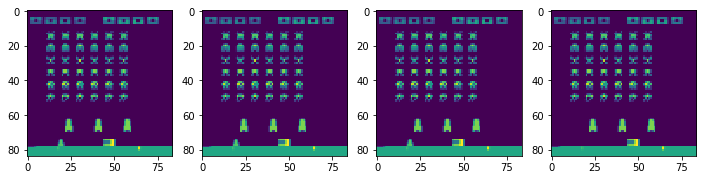

In [6]:
env.reset()

# Create a new state
next_state, reward, done, info = env.step((env.action_space.sample())) # select random action

print(np.asarray(next_state).transpose(2, 0, 1).shape)
# Plot the state
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
ax = axes.ravel()

for i, frame in enumerate(np.asarray(next_state).transpose(2, 0, 1)):
    ax[i].imshow(frame)

### Establishing a benchmark

I'll be using two benchmarks:
* The performance of an agent without training over 100 games
* The performance of a human

 score: 10.0: 100%|██████████| 100/100 [00:34<00:00,  2.96it/s]

Average score: 128.4


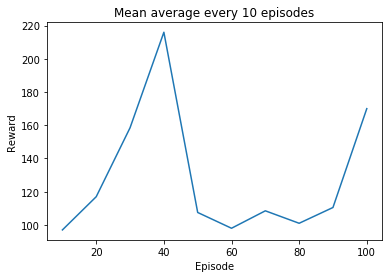

In [7]:
episodes_eval = 100
agent_bench = DQNAgent()
benchmark = Train(env, agent_bench)

# Evaluate performance
benchmark.train(episodes_eval, learn=False, render=False)

# Plot rewards
benchmark.plot_rewards()

## Training

Using a dueling net


 score: 225.0: 100%|██████████| 100/100 [02:31<00:00,  1.34s/it] 

Average score: 169.55


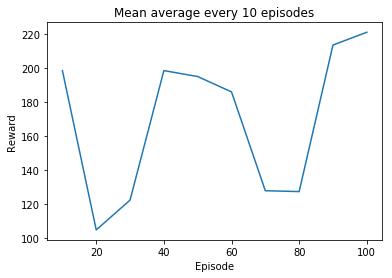

Average score: 169.55


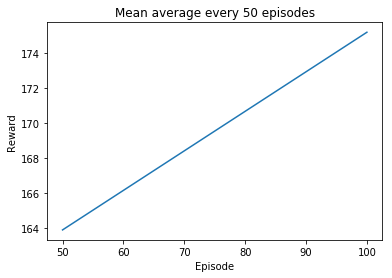

Average score: 169.55


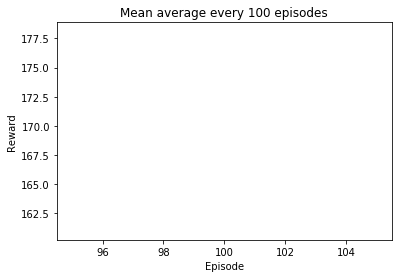

In [8]:
episodes_train = 50000
agent_train = DQNAgent(dueling=True)
# Load existing saved weights
# Comment if don't want to load pre-trained weights
#agent_train.load_weights('best_model_dueling')

train = Train(env, agent_train)
# Train the agent
train.train(episodes_train, learn=True, render=False)

# Plot rewards
train.plot_rewards(mean_avg=10)
train.plot_rewards(mean_avg=50)
train.plot_rewards(mean_avg=100)

Using a dueling net


 score: 240.0: 100%|██████████| 100/100 [00:58<00:00,  1.54it/s]

Average score: 125.05


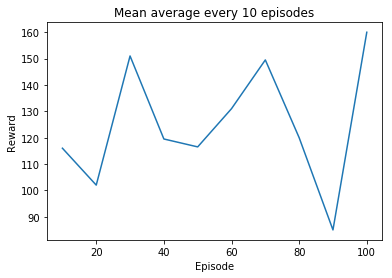

In [9]:
# Evaluate the trained agent
# agent_trained = train.agent
agent_trained = DQNAgent(dueling=True)
agent_trained.load_weights('best_model_dueling')
evaluation = Train(env, agent_trained)

# Evaluate performance
evaluation.train(episodes_eval, learn=False, render=True, monitor=True)

# Plot rewards
evaluation.plot_rewards(mean_avg=10)